In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Input array
X = np.array([[1, 0, 1, 0], [1 ,0 ,1 ,1 ],[ 0 , 1 , 0 , 1 ]])

#Output
y = np.array([[1], [1], [0]])

In [2]:
#Sigmoid Function
def sigmoid(x): 
    return  1/(1+np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x): 
    return x*(1-x)

In [3]:
# Define hyper-parameters
lr = 0.05
epochs = 1000
X_sample_size = X.shape[0]
input_layer_neural = X.shape[1]
hidden_layer_neural = 3
output_layer_neural = y.shape[1]

input_hidden_weight = np.random.normal(size=(input_layer_neural, hidden_layer_neural))
input_hidden_bias = np.ones(shape=(1, hidden_layer_neural))
hidden_output_weight = np.random.normal(size=(hidden_layer_neural, output_layer_neural))
hidden_output_bias = np.ones(shape=(1, output_layer_neural))

# 作業 
* 請參閱範例中的 hidden Layer 寫法, 完成 output Layer 的程式

In [4]:
loss_arr = np.array([])
for i in range(epochs):
    # forward pass
    z1 = X.dot(input_hidden_weight) + input_hidden_bias
    hidden_output = sigmoid(z1)

    z2 = hidden_output.dot(hidden_output_weight) + hidden_output_bias
    output_value = sigmoid(z2)
    
    # backword pass
    loss = (2/X_sample_size)*np.sum(np.abs(y - output_value)) # parital loss respect y
    loss_arr = np.append(loss_arr, loss)

    partial_output_respect_z2 = derivatives_sigmoid(output_value) # Calculate parital output value respect z2
    partial_hidden_output_respect_z1 = derivatives_sigmoid(hidden_output) # Calculate parital hidden output respect z1

    partial_loss_respect_z2 = partial_output_respect_z2 * loss 

    partial_loss_respect_hidden_output = partial_loss_respect_z2.dot(hidden_output_weight.T)
    partial_loss_respect_z1 = partial_loss_respect_hidden_output * partial_hidden_output_respect_z1

    input_hidden_weight_gradient = X.T.dot(partial_loss_respect_z1)
    hidden_output_weight_gradient = hidden_output.T.dot(partial_loss_respect_z2)

    input_hidden_weight += input_hidden_weight_gradient * lr
    input_hidden_bias += np.sum(partial_loss_respect_z1, axis=0, keepdims=True)

    hidden_output_weight += hidden_output_weight_gradient *lr
    hidden_output_bias += np.sum(partial_loss_respect_z2, axis=0, keepdims=True)
    
    if i % 100 == 0:
        print('epochs: {}, loss: {}'.format(i, loss))

epochs: 0, loss: 0.8150782531640411
epochs: 100, loss: 0.6686500130045518
epochs: 200, loss: 0.6676771485039987
epochs: 300, loss: 0.6673485704456956
epochs: 400, loss: 0.6671827544378277
epochs: 500, loss: 0.6670825295450934
epochs: 600, loss: 0.667015300502702
epochs: 700, loss: 0.6669670248763936
epochs: 800, loss: 0.6669306495752785
epochs: 900, loss: 0.666902240386453


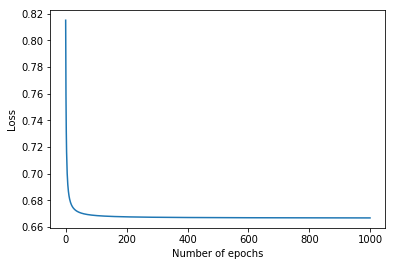

In [5]:
plt.plot(list(range(epochs)), loss_arr)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()